# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

In [16]:
#imports
import math
import random
import timeit
import matplotlib.pyplot as plt 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [17]:
def orientation(p1, p2, p3): 
    """
    Cross product between three points.
    
    Parameters:
    p1 (tuple): The first point as a tuple of x and y coordinates.
    p2 (tuple): The second point as a tuple of x and y coordinates.
    p3 (tuple): The second point as a tuple of x and y coordinates.
    
    Returns:
    float: The cross product between the three points.
    """
    
    return (p3[1]-p2[1])*(p2[0]-p1[0]) - (p2[1]-p1[1])*(p3[0]-p2[0])

def dist(p1, p2): 
    """
    Calculate the Euclidean distance between two points.
    
    Parameters:
    p1 (tuple): The first point as a tuple of x and y coordinates.
    p2 (tuple): The second point as a tuple of x and y coordinates.

    Returns:
    float: The Euclidean distance between the two points.
    """
    
    return (p2[1] - p1[1])**2 + (p2[0] - p1[0])**2

def findLeftmostPoint(inputSet):
    """
    Finds the leftmost point in the input set.
    
    Parameters:
    inputSet (list): The input set as a list of tuples, where each tuple contains x and y coordinates.

    Returns:
    tuple: The leftmost point in the input set. If there are ties, the point with the lowest y-coordinate is returned.
    """
   
    leftmostPoint = inputSet[0]  
    for i in range(len(inputSet)): 
            # Choose lowest x, break ties by choosing lowest y
        if inputSet[i][1] < leftmostPoint[1] or (inputSet[i][1] == leftmostPoint[1] and inputSet[i][0] < leftmostPoint[0]):
            leftmostPoint = inputSet[i] 
    return leftmostPoint

def jarvismarch(inputSet):
    """
    Perform the Jarvis march algorithm (also known as the gift wrapping algorithm) to find the convex hull of a set of points.
  
    Parameters:
    inputSet (list): A list of 2D points as tuples of x and y coordinates.

    Returns:
    outputSet (list): A list of 2D points that lie on the convex hull.
    """
    
    left = findLeftmostPoint(inputSet) 
    onHull = left
    outputSet = []
    nextPoint = None
    while nextPoint !=left: # Algorithm continues until the leftmost point is reached again
        outputSet.append(onHull) 
        nextPoint = inputSet[0] 
        for point in inputSet: 
            o = orientation(onHull, nextPoint, point) 
            if nextPoint == onHull or o > 0 or (o == 0 and dist(onHull, point) > dist(onHull, nextPoint)):
                nextPoint = point # If orientation is: (>0) or (=0 and the distance is greater), the next point is updated
        onHull = nextPoint
    return outputSet


Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [18]:
def quickSort(numbers, lowest, highest):
    """
    Sorts a list of numbers using the quicksort algorithm.

    Parameters:
        numbers (list): The list of numbers to sort.
        lowest (int): The starting index for the sort.
        highest (int): The ending index for the sort.

    Returns:
        list: The sorted list of numbers.
    """
    if (highest <= lowest):
        return
    j = partition(numbers, lowest, highest)
    quickSort(numbers, lowest, j-1)
    quickSort(numbers,j+1,highest)
    return numbers
def partition(numbers, lowest, highest):
    """
    Partitions a list of numbers around a pivot, used in the quicksort algorithm.

    Parameters:
        numbers (list): The list of numbers to partition.
        lowest (int): The starting index for the partition.
        highest (int): The ending index for the partition.

    Returns:
        int: The index of the pivot after partitioning."""

    i = lowest
    j = highest + 1
    pivot = lowest

    while True:
        j -= 1
        i += 1
        while numbers[i][1] < numbers[pivot][1] or (numbers[i][1] == numbers[pivot][1] and numbers[i][2] < numbers[pivot][2]):
            if i == highest:
                break
            i += 1

        while numbers[j][1] > numbers[pivot][1] or (numbers[j][1] == numbers[pivot][1] and numbers[j][2] > numbers[pivot][2]):
            if j == lowest:
                break
            j -= 1

        if i >= j:
            break
        numbers[i], numbers[j] = numbers[j], numbers[i]

    numbers[pivot], numbers[j] = numbers[j], numbers[pivot]

    return j

def heapSort(numbers):
    """
    Sorts a list of numbers using the heap sort algorithm.

    Parameters:
        numbers (list): The list of numbers to sort.

    Returns:
        list: The sorted list of numbers.
    """
        
    endLeaf = len(numbers)
    numbers = [0] + numbers
    # Process nodes from bottom to top (ignoring child-less nodes)
    for i in range(endLeaf // 2, 0, -1):
        heapify(numbers, i, endLeaf)
    # Pop the root and maintain heap
    for i in range(endLeaf, 0, -1):
        numbers[i], numbers[1] = numbers[1], numbers[i]
        heapify(numbers, 1, i-1)

    return numbers[1:]
def heapify(heap, nodeIndex, leaf):
    """
    Transforms a list into a heap, from a given node down to a given leaf.

    Parameters:
        heap (list): The list to transform into a heap.
        nodeIndex (int): The index of the starting node.
        leaf (int): The index of the last leaf.
    """
    largestIndex = nodeIndex
    leftChild = 2*nodeIndex
    rightChild = 2*nodeIndex + 1
    # Sorts list in ascending order by angle, breaking ties using distance
    if leftChild <= leaf and (heap[leftChild][1] > heap[largestIndex][1] or (heap[leftChild][1] == heap[largestIndex][1] and heap[leftChild][2] > heap[largestIndex][2])):
        largestIndex = leftChild

    if rightChild <= leaf and (heap[rightChild][1] > heap[largestIndex][1] or (heap[rightChild][1] == heap[largestIndex][1] and heap[rightChild][2] > heap[largestIndex][2])):
        largestIndex = rightChild

    # If a node violates the parent-child relationship, sink with the more violating child 
    if largestIndex != nodeIndex:
        heap[nodeIndex], heap[largestIndex] = heap[largestIndex], heap[nodeIndex]
        heapify(heap, largestIndex, leaf)

def mergeSort(numbers):
    """
    Sorts a list of numbers using the merge sort algorithm.

    Parameters:
        numbers (list): The list of numbers to sort.

    Returns:
        list: The sorted list of numbers.
        """
        
    if (len(numbers) > 1):
        return merge(mergeSort(numbers[:len(numbers)//2]),mergeSort(numbers[len(numbers)//2:]))
    else:
        return numbers
def merge(arr1, arr2):
    """
    Merges two sorted lists into one sorted list.

    Parameters:
        arr1 (list): The first sorted list.
        arr2 (list): The second sorted list.

    Returns:
        list: The merged sorted list.
    """
        
    new_arr = []
    i = 0
    j = 0
    while i < len(arr1) and j < len(arr2):
        if arr1[i][1] < arr2[j][1] or (arr1[i][1] == arr2[j][1] and arr1[i][2] < arr2[j][2]):
            new_arr.append(arr1[i])
            i += 1
        else:
            new_arr.append(arr2[j])
            j += 1

    if i < len(arr1):
        new_arr.extend(arr1[i:])
    elif j < len(arr2):
        new_arr.extend(arr2[j:])
    return new_arr

def findLowestPoint(inputSet):
    """
    Finds the point with the lowest y-coordinate (and lowest x-coordinate in case of a tie) in a set of points.

    Parameters:
        inputSet (list): The list of points as tuples of x and y coordinates.

    Returns:
        tuple: The index and coordinates of the lowest point.
    """
        
    lowestPoint = inputSet[0]  
    lowestIndex = 0
    for i in range(len(inputSet)):
        # Choose lowest y, break ties by choosing lowest x
        if inputSet[i][1] < lowestPoint[1] or (inputSet[i][1] == lowestPoint[1] and inputSet[i][0] < lowestPoint[0]):
            lowestPoint = inputSet[i]
            lowestIndex = i
    
    return lowestIndex, lowestPoint

def turnMade(point1, point2, point3):
    """
    Determine the relative direction of the turn made by three points.
    The function calculates the cross product of the vectors formed by point1-point2 and point1-point3. 
    The sign of the result indicates the direction of the turn:
    - If the result is positive, the direction is counter-clockwise.
    - If the result is negative, the direction is clockwise.
    - If the result is zero, the points are collinear.

    Parameters:
    point1, point2, point3 (tuple): The points as tuples of x and y coordinates.

    Returns:
    float: The cross product of the vectors formed by point1-point2 and point1-point3."""
   
    return (point2[0] - point1[0]) * (point3[1]-point1[1]) - (point2[1]-point1[1]) * (point3[0] - point1[0])


def polarAngle(point1, point2):
    """
    Calculate the polar angle between two points.
    
    Parameters:
    point1 (tuple): The origin point as a tuple of x and y coordinates.
    point2 (tuple): The second point as a tuple of x and y coordinates.

    Returns:
    float: The polar angle in radians.
    """

    return math.atan2((point2[1] - point1[1]), (point2[0] - point1[0]))


def grahamscan(inputSet, sortingAlgorithmToUse = "merge"):
    
    """
    Perform the Graham scan algorithm to find the convex hull of a set of points.
    Note: You can choose the sorting algorithm to use: "heap" for heap sort, "merge" for mergesort ect.

    Parameters:
    inputSet (list): A list of 2D points as tuples of x and y coordinates.
    sortingAlgorithmToUse (str): The sorting algorithm to use ("merge", "heap", "bubble", or "quick").

    Returns:
    outputSet (list): A list of 2D points that lie on the convex hull."""
    lowestIndex, lowestPoint = findLowestPoint(inputSet) 
    inputSet[0] , inputSet[lowestIndex] = inputSet[lowestIndex] , inputSet[0]
    # Sorts the remaining points based on their polar angle with the lowestPoint (inputSet[0])
    sortedPointsWithAngles = [(point, polarAngle(lowestPoint, point), dist(lowestPoint, point)) for point in inputSet[1:]]
    if sortingAlgorithmToUse == "merge":
        sortedPointsWithAngles = mergeSort(sortedPointsWithAngles)
    elif sortingAlgorithmToUse == "heap":
        sortedPointsWithAngles = heapSort(sortedPointsWithAngles)
    elif sortingAlgorithmToUse == "quick":
        sortedPointsWithAngles = quickSort(sortedPointsWithAngles, 0, len(sortedPointsWithAngles) - 1)
    sortedPoints = [point for point, angle, distance in sortedPointsWithAngles]
    convexHull = []
    convexHull.append(inputSet[0])
    convexHull.append(sortedPoints[0])
    i = 2
    previousAngleWasColinear = False
    while i < len(sortedPoints):
        # Consider the next three points in the convex hull
        lastPoint = convexHull[-1]
        lastPointBefore = convexHull[-2]
        pointConsidered = sortedPoints[i]
        turnDirection = turnMade(lastPointBefore, lastPoint, pointConsidered)
        # Counter-Clockwise of the most recent three points, so add to the hull
        if (turnDirection > 0):
            convexHull.append(pointConsidered)
            previousAngleWasColinear = False
            i += 1
        # Clockwise of the most recent three points, so pop from the hull
        elif len(convexHull) > 2 and turnDirection < 0:
            convexHull.pop()
            previousAngleWasColinear = False
        elif (turnDirection == 0):
            # If we're in a sequence of colinear points, pop the previous node because we've found another colinear point
            # Or edge case: where the third point (2nd index) in sortedPoints started a colinear sequence, so the second point (1st index) should be discarded
            if previousAngleWasColinear == True or i == 2:
                convexHull.pop()
            convexHull.append(pointConsidered)
            previousAngleWasColinear = True
            i += 1
        else:
            i+=1
    outputSet = convexHull
    return outputSet

Use the cell below for all python code needed to realise the **Chan's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [19]:
def divideSet(lst, m):
    """
    Divides the input list into sublists of size m.

    Parameters:
    lst (list): The input list.
    m (int): The size of each sublist.

    Returns:
    list: A list of sublists of the input list.
    """
    
    return [lst[i:i + m] for i in range(0, len(lst), m)]


def jarvismarchForChan(inputSet, m, left):
    """
    Implements Jarvis march for a subset of the input points.

    Parameters:
    inputSet (list): The input set as a list of tuples, where each tuple contains x and y coordinates.
    m (int): The size of the subset.
    left (tuple): The leftmost point in the input set.

    Returns:
    list: The convex hull of the subset as a list of tuples.
    """
    
    onHull = left
    outputSet = []
    nextPoint = None
    i = 0
    while nextPoint !=left:
        if i > m**2:
            return None
        outputSet.append(onHull)
        nextPoint = inputSet[0] 
        for point in inputSet:
            o = orientation(onHull, nextPoint, point) 
            if nextPoint == onHull or o > 0 or (o == 0 and dist(onHull, point) > dist(onHull, nextPoint)):
                nextPoint = point
        onHull = nextPoint
    return outputSet


def chan(inputSet):
    """
    Implements Chan's algorithm for finding the convex hull of a set of points.

    Parameters:
    inputSet (list): The input set as a list of tuples, where each tuple contains x and y coordinates.

    Returns:
    list: The convex hull of the input set as a list of tuples.
    """
    
    n = len(inputSet)
    m = 2
    left = findLeftmostPoint(inputSet)
    while m < n:
        partitions = divideSet(inputSet, m)
        hulls = []
        for p in partitions:
            hulls += grahamscan(p, "merge")
        
        out = jarvismarchForChan(hulls, m, left)
        if out is not None:
            return out
        m = m**2
    raise Exception("No hull found")



Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [20]:
class TestDataGenerator():
    """
    A class to represent a synthetic data generator.

    Attributes
    ----------
    None
    
    Methods
    -------
    generateCircularPoints(num_points, radius=1000, center=(0, 0)):
        Generates a list of points arranged in a circle.
    generateListRandomPoints(rangeMin, rangeMax, amount):
        Generates a list of random points within a specified range.
    generateHeapSortWorstCase(inputData):
        Generates the worst-case scenario for heap sort.
    generateQuickSortWorstCase(inputData):
        Generates the worst-case scenario for quick sort.
    generateMergeSortWorstCase(inputData):
        Generates the worst-case scenario for merge sort.
    worstCaseMergeSortHelper(inputArray):
        Helper function for generating the worst-case scenario for merge sort.
    genRandWithNH(n, h, max_val = 32767):
        Generates a list of points with a specified number of points on the hull.
    """

    def generateListRandomPoints(self, rangeMin, rangeMax, amount):
        """
        Generates a list of random points within a specified range.

        Parameters:
        rangeMin (int): The minimum value for the x and y coordinates of the points.
        rangeMax (int): The maximum value for the x and y coordinates of the points.
        amount (int): The number of points to generate.

        Returns:
        list: A list of points as tuples of x and y coordinates.
        """
        dataPoints = set()
        while len(dataPoints) < amount:
            point = (random.randint(rangeMin, rangeMax), random.randint(rangeMin, rangeMax))
            dataPoints.add(point)
        return list(dataPoints)
    
        
    def generateHeapSortWorstCase(self, inputData):
        """
        Generates the worst-case scenario for heap sort.

        Parameters:
        rangeMin (int): The minimum value for the x and y coordinates of the points.
        rangeMax (int): The maximum value for the x and y coordinates of the points.
        amount (int): The number of points to generate.

        Returns:
        list: The worst-case scenario for heap sort as a list of tuples.
        """
        inputSet = inputData.copy()
        lowestIndex, lowestPoint = findLowestPoint(inputSet) 
        inputSet[0] , inputSet[lowestIndex] = inputSet[lowestIndex] , inputSet[0]
        sortedPointsWithAngles = [(point, polarAngle(lowestPoint, point), dist(lowestPoint, point)) for point in inputSet[1:]]
        sortedPointsWithAngles = heapSort(sortedPointsWithAngles)
        sortedPointsWithAngles.reverse()
        return [inputSet[0]] + [point for point, angle, distance in sortedPointsWithAngles]
    
    def generateQuickSortWorstCase(self, inputData):
        """
        Generates the worst-case scenario for quicksort.

        Parameters:
        inputData (list): The input data as a list of tuples, where each tuple contains x and y coordinates.

        Returns:
        list: The worst-case scenario for quicksort as a list of tuples.
        """
        inputSet = inputData.copy()
        lowestIndex, lowestPoint = findLowestPoint(inputSet) 
        inputSet[0] , inputSet[lowestIndex] = inputSet[lowestIndex] , inputSet[0]
        sortedPointsWithAngles = [(point, polarAngle(lowestPoint, point), dist(lowestPoint, point)) for point in inputSet[1:]]
        sortedPointsWithAngles = quickSort(sortedPointsWithAngles, 0, len(sortedPointsWithAngles) - 1)
        return [inputSet[0]] + [point for point, angle, distance in sortedPointsWithAngles]
    
    def generateMergeSortWorstCase(self, inputData):
        """
        Generates the worst-case scenario for merge sort.

        Parameters:
        inputData (list): The input data as a list of tuples, where each tuple contains x and y coordinates.

        Returns:
        list: The worst-case scenario for merge sort as a list of tuples.
        """
        inputSet = inputData.copy()
        lowestIndex, lowestPoint = findLowestPoint(inputSet) 
        inputSet[0] , inputSet[lowestIndex] = inputSet[lowestIndex] , inputSet[0]
        sortedPointsWithAngles = [(point, polarAngle(lowestPoint, point), dist(lowestPoint, point)) for point in inputSet[1:]]
        sortedPointsWithAngles = mergeSort(sortedPointsWithAngles)
        sortedPointsWithAngles = self.worstCaseMergeSortHelper(sortedPointsWithAngles)
        return [inputSet[0]] + [point for point, angle, distance in sortedPointsWithAngles]
    
    def worstCaseMergeSortHelper(self, inputArray):
        """
        Helper function for generating the worst-case scenario for merge sort.

        Parameters:
        inputArray (list): The input array as a list of tuples, where each tuple contains x and y coordinates.

        Returns:
        list: The worst-case scenario for merge sort as a list of tuples.
        """
        n = len(inputArray)
        if n > 2:
            left = [inputArray[i] for i in range(0, n, 2)]
            right = [inputArray[i] for i in range(1, n, 2)]
            return self.worstCaseMergeSortHelper(right) + self.worstCaseMergeSortHelper(left)
        else:
            sortedArray = mergeSort(inputArray)
            sortedArray.reverse()
            return sortedArray

    
    def genRandWithNH(self, n, h, maxVal = 32767):
        """
        Generates a list of n points with a specified number of points (h) on the hull.

        Parameters:
        n (int): The total number of points.
        h (int): The number of points on the hull.
        maxVal (int, optional): The maximum value for the x and y coordinates of the points. Defaults to 32767.

        Returns:
        list: A list of points as tuples of x and y coordinates.
        """
        circleCentre = maxVal / 2.0
        radiusH = (maxVal) / 2.0
        angleStep = 2 * math.pi / h
        points = [(round(circleCentre + radiusH * math.cos(i * angleStep)),
                round(circleCentre + radiusH * math.sin(i * angleStep))) for i in range(h)]
        radiusN = radiusH * math.cos(angleStep/2)
        for _ in range(n - h):
            x = random.uniform(circleCentre-radiusN, circleCentre+radiusN)
            y = random.uniform(circleCentre-radiusN, circleCentre+radiusN)
            while (x - circleCentre) ** 2 + (y - circleCentre) ** 2 > radiusN**2:
                x = random.uniform(circleCentre-radiusN, circleCentre+radiusN)
                y = random.uniform(circleCentre-radiusN, circleCentre+radiusN)
            points.append((round(x), round(y)))
        return points
    def __init__(self):
        pass


Use the cell below to implement the requested **experimental framework** API.

In [21]:
class ExperimentalFramework():
    """
    A class to represent an experimental framework for testing the performance of different algorithms.

    Attributes
    ----------
    rangeMinimum : int
        The minimum range for generating test data.
    rangeMaximum : int
        The maximum range for generating test data.
    ranges : list
        The list of ranges for which the algorithms will be tested.
    numOfTests : int
        The number of times each algorithm will be run for each range.

    Methods
    -------
    plot(title, ranges, times, labels):
        Plots the execution times of the algorithms for different ranges.
    reportGrahamScan():
        Tests the performance of the Graham scan algorithm and prints the results.
    reportJarvisMarch():
        Tests the performance of the Jarvis march algorithm and prints the results.
    reportChan():
        Tests the performance of the Chan's algorithm and prints the results.
    comparativeAssessment():
        Compares the performance of all three algorithms and prints the results.
    """
    numOfTests = 8
    rangeMinimum = 0
    rangeMaximum = 32767
    
    def plot(self, title, ranges, times, labels):
        plt.title(title)
        colors = ['b', 'r', 'g', 'y', 'm', 'c'] 
        for i in range(len(times)):
            plt.scatter(ranges, times[i], color=colors[i])
            plt.plot(ranges, times[i], color=colors[i], label=labels[i])
        plt.xlabel('Number of Points (n)')
        plt.ylabel('Time Taken (ms)')
        plt.grid(color='black', linestyle='--', linewidth=0.5)
        plt.legend()
        plt.show()

    def reportGrahamScan(self):
        sortingAlgorithmsToUse=["merge", "heap", "quick"]
        ranges = self.ranges
        numOfTests=self.numOfTests
        # Graham scan average case 
        inputData = []
        for num in ranges:
            inputData.append(self.testData.generateListRandomPoints(self.rangeMinimum, self.rangeMaximum, num))
        averageAlgorithmTimeMerge = []    
        averageAlgorithmTimeHeap = []
        averageAlgorithmTimeQuick = []
        for algorithm in sortingAlgorithmsToUse:
            for i in range(len(ranges)):
                executionTime = min(timeit.Timer(lambda: grahamscan(inputData[i], algorithm)).repeat(repeat=numOfTests, number=1))
                executionTime = executionTime* 1000
                if algorithm == "merge":
                    averageAlgorithmTimeMerge.append(executionTime)
                elif algorithm == "heap":
                    averageAlgorithmTimeHeap.append(executionTime)
                elif algorithm == "quick":
                    averageAlgorithmTimeQuick.append(executionTime)
        result = [(str(r) + " data points", str(m) + "ms (merge)", str(h) + "ms (heap)",  str(q) + "ms (quick)") for r, m, h, q in zip(ranges, averageAlgorithmTimeMerge, averageAlgorithmTimeHeap, averageAlgorithmTimeQuick)]
        print("Average Case Graham Scan: ", result)
        inputData = []
        inputDataMerge = []
        inputDataHeap = []
        inputDataQuick = []
        for num in ranges:
            inputData.append(self.testData.generateListRandomPoints(self.rangeMinimum, self.rangeMaximum, num))
        for num in inputData:
            inputDataMerge.append(self.testData.generateMergeSortWorstCase(num))
            inputDataHeap.append(self.testData.generateHeapSortWorstCase(num))
            inputDataQuick.append(self.testData.generateQuickSortWorstCase(num))
        # Graham scan worst-case
        worstAlgorithmTimeMerge = []    
        worstAlgorithmTimeHeap = []
        worstAlgorithmTimeQuick = []
        for algorithm in sortingAlgorithmsToUse:
            for i in range(len(ranges)):
                if algorithm == "merge":
                    executionTime = min(timeit.Timer(lambda: grahamscan(inputDataMerge[i], algorithm)).repeat(repeat=numOfTests, number=1))
                    executionTime = executionTime* 1000
                    worstAlgorithmTimeMerge.append(executionTime)
                elif algorithm == "heap":
                    executionTime = min(timeit.Timer(lambda: grahamscan(inputDataHeap[i], algorithm)).repeat(repeat=numOfTests, number=1))
                    executionTime = executionTime* 1000
                    worstAlgorithmTimeHeap.append(executionTime)
                elif algorithm == "quick":
                    executionTime = min(timeit.Timer(lambda: grahamscan(inputDataQuick[i], algorithm)).repeat(repeat=numOfTests, number=1))
                    executionTime = executionTime* 1000
                    worstAlgorithmTimeQuick.append(executionTime)
        result = [(str(r) + " data points", str(m) + "ms (merge)", str(h) + "ms (heap)",  str(q) + "ms (quick)") for r, m, h, q in zip(ranges, worstAlgorithmTimeMerge, worstAlgorithmTimeHeap, worstAlgorithmTimeQuick)]
        print("Worst Case Graham Scan: ", result)
        self.plot("Graham Scan Average", ranges, [averageAlgorithmTimeMerge, averageAlgorithmTimeHeap, averageAlgorithmTimeQuick], ['Merge Sort', 'Heap Sort', 'Quick Sort'])
        self.plot("Graham Scan Worst", ranges, [worstAlgorithmTimeMerge, worstAlgorithmTimeHeap, worstAlgorithmTimeQuick], ['Merge Sort', 'Heap Sort', 'Quick Sort'])
   
    def reportJarvisMarch(self):
        ranges = self.ranges
        numOfTests=self.numOfTests
        # Jarvis march average case
        inputData = []
        for num in ranges:
            inputData.append(self.testData.generateListRandomPoints(self.rangeMinimum, self.rangeMaximum, num))
        algorithmTimes = []
        for i in range(len(ranges)):
            executionTime = min(timeit.Timer(lambda: jarvismarch(inputData[i])).repeat(repeat=numOfTests, number=1))
            executionTime = executionTime* 1000
            algorithmTimes.append(executionTime)
        averageAlgorithmTimes = algorithmTimes
        # Jarvis march worst case
        inputData = []
        for num in ranges:
            inputData.append(self.testData.genRandWithNH(num, num))
        algorithmTimes = []
        for i in range(len(ranges)):
            executionTime = min(timeit.Timer(lambda: jarvismarch(inputData[i])).repeat(repeat=numOfTests, number=1))
            executionTime = executionTime* 1000
            algorithmTimes.append(executionTime)
        worstAlgorithmTimes = algorithmTimes
        result = [(str(r) + " data points", str(a) + "ms (average)", str(w) + "ms (worst)") for r, a, w in zip(ranges, averageAlgorithmTimes, worstAlgorithmTimes)]
        print(result)
        self.plot("Jarvis March", ranges, [averageAlgorithmTimes, worstAlgorithmTimes], ['Average', 'Worst'])

    def reportChan(self):
        ranges = self.ranges
        numOfTests=self.numOfTests
        numOfTests = 1
        # Chan's algorithm average case
        inputData = []
        for num in ranges:
            inputData.append(self.testData.generateListRandomPoints(self.rangeMinimum, self.rangeMaximum, num))
        algorithmTimes = []
        for i in range(len(ranges)):
            executionTime = min(timeit.Timer(lambda: chan(inputData[i])).repeat(repeat=numOfTests, number=1))
            executionTime = executionTime* 1000
            algorithmTimes.append(executionTime)
        averageAlgorithmTimes = algorithmTimes
        # Chan's algorithm worst-case
        inputData = []
        for num in ranges:
            inputData.append(self.testData.genRandWithNH(num, num))
        algorithmTimes = []
        for i in range(len(ranges)):
            executionTime = min(timeit.Timer(lambda: chan(inputData[i])).repeat(repeat=numOfTests, number=1))
            executionTime = executionTime* 1000
            algorithmTimes.append(executionTime)
        worstAlgorithmTimes = algorithmTimes
        result = [(str(r) + " data points", str(a) + "ms (average)", str(w) + "ms (worst)") for r, a, w in zip(ranges, averageAlgorithmTimes, worstAlgorithmTimes)]
        print("Chan "  , result)
        self.plot("Chan", ranges, [averageAlgorithmTimes, worstAlgorithmTimes], ['Average', 'Worst'])
    
    def comparativeAssessment(self, n = 1):
        ranges = self.ranges
        numOfTests=self.numOfTests
        inputData = []
        if n == 1:
            for num in ranges:
                inputData.append(self.testData.genRandWithNH(num, num))
        elif n == 2:
            for num in ranges:
                inputData.append(self.testData.genRandWithNH(num, 5))
        jarvismarchaverageAlgorithmTimes = []
        grahamscanaverageAlgorithmTimeMerge = []
        chanaverageAlgorithmTimes = []
        for i in range(len(ranges)):
            executionTime = min(timeit.Timer(lambda: jarvismarch(inputData[i])).repeat(repeat=numOfTests, number=1))
            executionTime = executionTime* 1000
            jarvismarchaverageAlgorithmTimes.append(executionTime)

            executionTime = min(timeit.Timer(lambda: grahamscan(inputData[i], "merge")).repeat(repeat=numOfTests, number=1))
            executionTime = executionTime* 1000
            grahamscanaverageAlgorithmTimeMerge.append(executionTime)

            executionTime = min(timeit.Timer(lambda: chan(inputData[i])).repeat(repeat=numOfTests, number=1))
            executionTime = executionTime* 1000
            chanaverageAlgorithmTimes.append(executionTime)
        result = [(str(r) + " data points", str(a) + "ms (jarvis)", str(w) + "ms (grahamscan)", str(q) + "ms (chan)") for r, a, w, q in zip(ranges, jarvismarchaverageAlgorithmTimes, grahamscanaverageAlgorithmTimeMerge, chanaverageAlgorithmTimes)]
        print(result)
        if n == 1:
            self.plot("Comparative Assessment h = n", ranges, [jarvismarchaverageAlgorithmTimes, grahamscanaverageAlgorithmTimeMerge, chanaverageAlgorithmTimes], ['Jarvis March', 'Graham Scan (merge)', 'Chan'])
        
        elif n == 2:
            self.plot("Comparative Assessment h = 5", ranges, [jarvismarchaverageAlgorithmTimes, grahamscanaverageAlgorithmTimeMerge, chanaverageAlgorithmTimes], ['Jarvis March', 'Graham Scan (merge)', 'Chan'])
                
        
    def __init__(self):
        self.testData = TestDataGenerator()
        self.ranges = [i for i in range(250, 2801, 250)]
        

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

[('250 data points', '1.8934370000351919ms (average)', '11.054851999915627ms (worst)'), ('500 data points', '3.915468999935001ms (average)', '41.182854999988194ms (worst)'), ('750 data points', '4.212969000036537ms (average)', '81.40288399999918ms (worst)'), ('1000 data points', '3.7092149999580215ms (average)', '119.55237100005434ms (worst)'), ('1250 data points', '3.2996529999991253ms (average)', '163.6076290000119ms (worst)'), ('1500 data points', '4.843307999976787ms (average)', '196.10444900001767ms (worst)'), ('1750 data points', '6.231713000033778ms (average)', '239.72938299993984ms (worst)'), ('2000 data points', '8.125025000026653ms (average)', '307.4925810000195ms (worst)'), ('2250 data points', '10.141384999997172ms (average)', '346.31732699995155ms (worst)'), ('2500 data points', '8.661647000053563ms (average)', '391.55611000001045ms (worst)'), ('2750 data points', '9.17446200003269ms (average)', '409.23097100005634ms (worst)')]


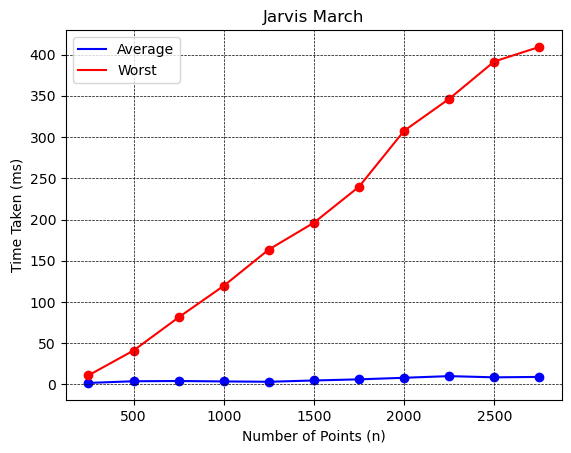

Average Case Graham Scan:  [('250 data points', '0.45474799992462067ms (merge)', '0.43492800000421994ms (heap)', '0.3146779999951832ms (quick)'), ('500 data points', '0.955650000037167ms (merge)', '0.9883879999961209ms (heap)', '0.7342659999949319ms (quick)'), ('750 data points', '1.528186000086862ms (merge)', '1.542843999914112ms (heap)', '1.1548040000661786ms (quick)'), ('1000 data points', '2.0911190000560964ms (merge)', '2.0991520000279706ms (heap)', '1.6004459999976461ms (quick)'), ('1250 data points', '2.6643810000450685ms (merge)', '2.718114999993304ms (heap)', '1.999938000039947ms (quick)'), ('1500 data points', '3.280080000081398ms (merge)', '3.4593430000313674ms (heap)', '2.417889999946965ms (quick)'), ('1750 data points', '3.863929999965876ms (merge)', '4.069012000059047ms (heap)', '2.8551420000439975ms (quick)'), ('2000 data points', '4.403305999971963ms (merge)', '4.653738999991219ms (heap)', '3.3383820000381093ms (quick)'), ('2250 data points', '5.081327999960195ms (merge

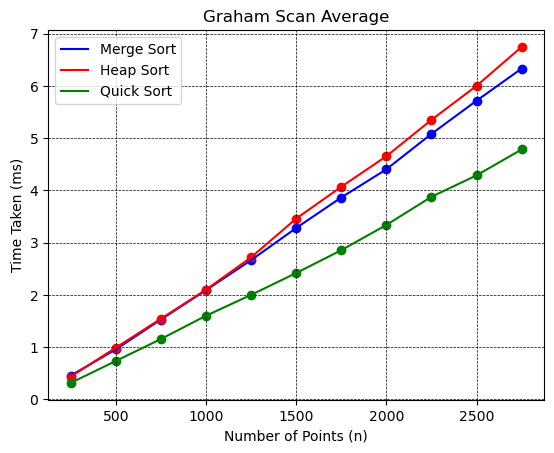

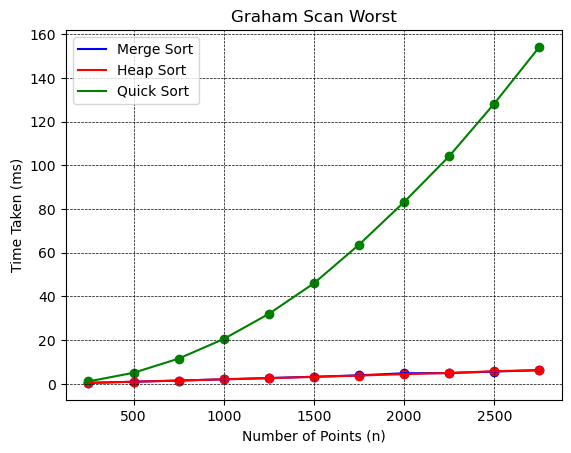

Chan  [('250 data points', '0.7926340000494747ms (average)', '13.800807000052373ms (worst)'), ('500 data points', '1.7793600000004517ms (average)', '41.957763000027626ms (worst)'), ('750 data points', '2.8816629999255383ms (average)', '81.49458699995193ms (worst)'), ('1000 data points', '3.3390350000672697ms (average)', '121.14960400003838ms (worst)'), ('1250 data points', '5.942374999904132ms (average)', '163.75202799997624ms (worst)'), ('1500 data points', '6.730735000019195ms (average)', '195.16748000000916ms (worst)'), ('1750 data points', '7.851936999941245ms (average)', '232.37738199998148ms (worst)'), ('2000 data points', '14.791342999956214ms (average)', '496.84432799995193ms (worst)'), ('2250 data points', '52.679654000030496ms (average)', '366.24243500000375ms (worst)'), ('2500 data points', '42.63856099998975ms (average)', '375.1343540000107ms (worst)'), ('2750 data points', '41.82068200009326ms (average)', '406.14050500005305ms (worst)')]


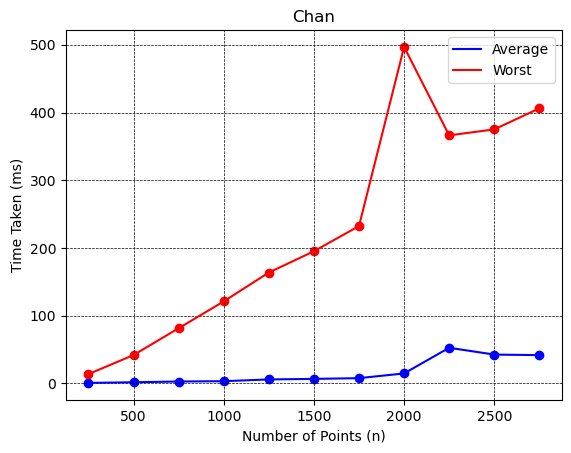

[('250 data points', '10.891386000025705ms (jarvis)', '0.3374359999952503ms (grahamscan)', '12.143769999966025ms (chan)'), ('500 data points', '45.64105800000107ms (jarvis)', '0.7106280000925835ms (grahamscan)', '46.63567500006138ms (chan)'), ('750 data points', '90.59173200000714ms (jarvis)', '1.0791810000227997ms (grahamscan)', '85.97554400000718ms (chan)'), ('1000 data points', '125.51536799992391ms (jarvis)', '1.5938760000153707ms (grahamscan)', '134.10465799995563ms (chan)'), ('1250 data points', '184.614578000037ms (jarvis)', '2.027802999919004ms (grahamscan)', '183.00456500003293ms (chan)'), ('1500 data points', '220.4124199998887ms (jarvis)', '2.529596000044876ms (grahamscan)', '221.08967700000903ms (chan)'), ('1750 data points', '254.35943299999053ms (jarvis)', '2.917547000038212ms (grahamscan)', '258.78350699997554ms (chan)'), ('2000 data points', '325.58275899998534ms (jarvis)', '3.541110000014669ms (grahamscan)', '326.8376040000476ms (chan)'), ('2250 data points', '367.8459

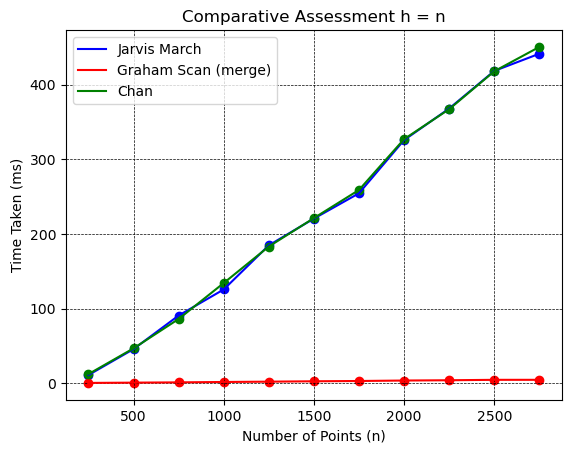

In [22]:
# ADD YOUR TEST CODE HERE 
framework = ExperimentalFramework()
framework.reportJarvisMarch()
framework.reportGrahamScan()
framework.reportChan()
framework.comparativeAssessment(1)




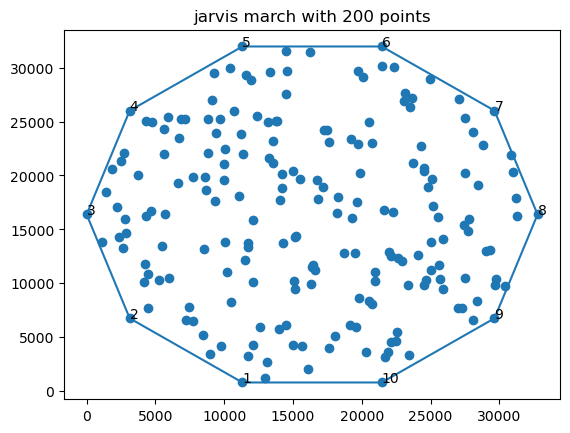

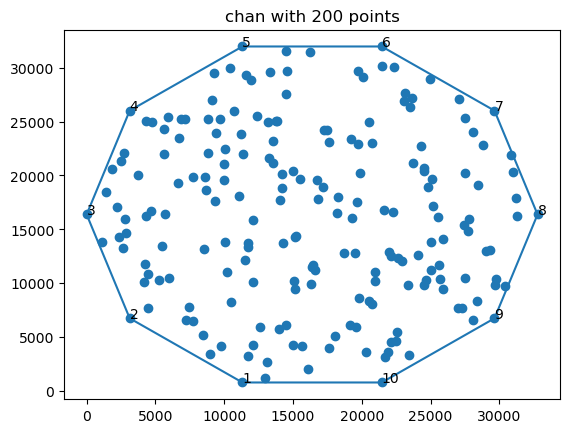

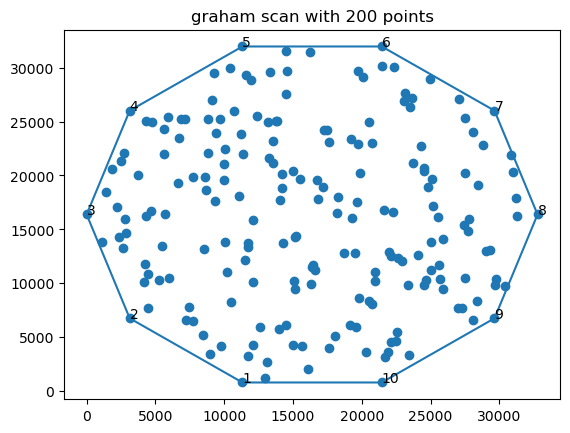

In [23]:
"""
This is an extra code block to show that the functionality of our algorihtms work
by displaying the convex hull generated on a grpah.
"""

def graph(inSet, outSet, title=""):
    plt.title(title)
    x = []
    y = []
    for i in inSet:
        x.append(i[0])
        y.append(i[1])
    plt.scatter(x, y)
    x = []
    y = []
    for i in outSet:
        x.append(i[0])
        y.append(i[1])
    x.append(outSet[0][0])
    y.append(outSet[0][1])    
    plt.plot(x, y)
    for i in range(len(outSet)):
        plt.text(x[i], y[i], f"{i+1}")   
    plt.show()

testData = TestDataGenerator()
resolution = 200
inputSet = testData.genRandWithNH(resolution, 10)

title = f"jarvis march with {resolution} points" 
hull = chan(inputSet)
graph(inputSet, hull, title)

title = f"chan with {resolution} points" 
hull = chan(inputSet)
graph(inputSet, hull, title)

title = f"graham scan with {resolution} points" 
hull = chan(inputSet)
graph(inputSet, hull, title)
